# In this we will cover example Machine learning problems
1.Linear regression
2.Multi linear regression
3.gradient descent
4.Logistic regression
5.Multiclass classification (logistic) with confusion matrix
6.Naive bayes algorithm
7.Naive bayes- spam detection

# Linear regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model #sklearn for data mining and data analysis, built on numpy,scipy and matplotlib

In [2]:
df=pd.read_csv(r"C:\Users\agnes\Downloads\canada_per_capita_income.csv")
df

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


In [5]:
df.rename(columns = {'per capita income (US$)':'percapita'}, inplace = True)

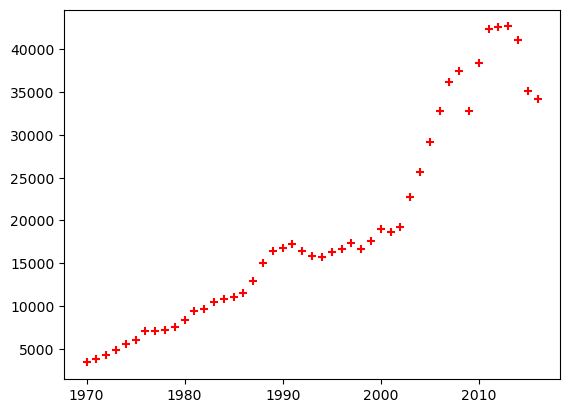

In [6]:
%matplotlib inline
plt.scatter (df.year,df.percapita,color='red',marker='+')

In [7]:
#applying linear regression
reg=linear_model.LinearRegression() #creating object for linear regression
reg.fit(df[['year']],df.percapita) #fitting the required data


LinearRegression()

In [12]:
year_1 = df.year.values.reshape(-1,1)
percapita_1=df.percapita.values.reshape(-1,1)

In [22]:
reg.predict([[1990]]) #predicted the percapita for year 1990

C:\Users\agnes\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([16434.74183774])

In [23]:
reg.coef_ #value of coefficient which is 'm' -slope in y=mx+b

array([828.46507522])

In [24]:
reg.intercept_ #value of coefficient which is 'y' -intercept in y=mx+b

-1632210.7578554575

In [25]:
## with formula y=mx+b
828.46507522*1990 +1632210.7578554575

3280856.2575432574

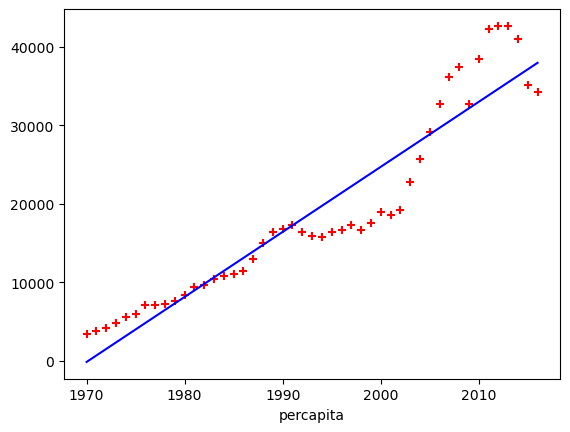

In [27]:
%matplotlib inline
plt.xlabel('year',fontsize=20)
plt.xlabel('percapita',fontsize=10)
plt.scatter (df.year,df.percapita,color='red',marker='+')
plt.plot(df.year,reg.predict(df[['year']]),color='blue')

# Multiple linear regression

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [36]:
df1=pd.read_csv(r"C:\Users\agnes\Downloads\Practice files\homeprices.csv")
df1

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [37]:
#calculate median
df1.bedrooms.median()

4.0

In [38]:
#to get whole number 
import math
median_bedroom=math.floor(df1.bedrooms.median())
median_bedroom

4

In [39]:
#fill na values with median values
df1.bedrooms.fillna(median_bedroom)

0    3.0
1    4.0
2    4.0
3    3.0
4    5.0
5    6.0
Name: bedrooms, dtype: float64

In [40]:
#assign it to original dataframe
df1.bedrooms=df1.bedrooms.fillna(median_bedroom)
df1

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [43]:
reg=linear_model.LinearRegression()
reg.fit(df1[['area','bedrooms','age']],df1.price) #train the model using training set 

LinearRegression()

In [44]:
reg.coef_ #which are coeffiencts as m1,m2,m3

array([  112.06244194, 23388.88007794, -3231.71790863])

In [46]:
reg.intercept_ #intercept is 'b' value

221323.00186540408

In [47]:
reg.predict([[3000,3,10]])

C:\Users\agnes\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([595359.7888393])

# gradient descent


In [57]:
import numpy as np
import matplotlib.pyplot as plt

In [58]:
%matplotlib inline
def gradient_descent(x,y):
    m_curr=b_curr=0 #start with some values of m current and b current
    iterations=1000 #the steps that you want to take to reach global minima
    n=len(x) #x is each data points
    learning_rate=0.001 #start with some point
    plt.scatter(x,y,color='red',marker='+',linewidth='5')
    for i in range(iterations):#for loop to loop thru iterations
        y_predicted=m_curr * x + b_curr #y=mx+b
        cost = (1/n)*sum([value**2 for value in (y-y_predicted)])
        plt.plot(x,y_predicted,color='green')
        md= -(2/n)*sum(x*(y-y_predicted)) # m derivative formula
        bd= -(2/n)*sum(y-y_predicted)
        m_curr=m_curr-learning_rate * md
        b_curr=b_curr-learning_rate * bd
        #print ("m {}, b {}, cost {} iteration {}".format(m_curr,b_curr,cost, i)) #printing each iteration
      


In [59]:
x=np.array([1,2,3,4,5])
y=np.array([5,7,9,11,13])

In [60]:
gradient_descent(x,y)

Error in callback <function _draw_all_if_interactive at 0x000001F4BB842480> (for post_execute):


TypeError: must be real number, not str

TypeError: must be real number, not str

<Figure size 640x480 with 1 Axes>

# Logistic regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df_ins=pd.read_csv(r"C:\Users\agnes\Downloads\Practice files\insurance_data.csv")
df_ins

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


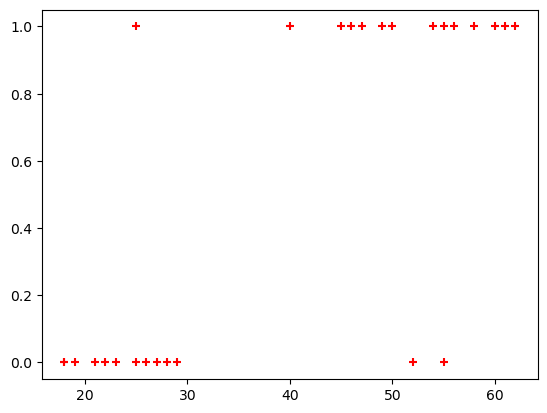

In [4]:
plt.scatter(df_ins.age,df_ins.bought_insurance,marker='+',color='red')

In [6]:
df_ins.shape #split this to training and testing

(27, 2)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df_ins[['age']],df_ins.bought_insurance,train_size=0.9) #keeping training set size for 90%

In [9]:
X_test

,age
20,21
7,60
0,22


In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
model=LogisticRegression() #creating object for the model

In [14]:
model.fit(X_train,y_train) #fitting always for training

LogisticRegression()

In [15]:
model.predict(X_test)

array([0, 1, 0], dtype=int64)

In [16]:
model.score(X_test,y_test)

1.0

In [17]:
model.predict_proba(X_test) #predicting the probablity

array([[0.90101411, 0.09898589],
       [0.0613639 , 0.9386361 ],
       [0.88913893, 0.11086107]])

# Multiclass classification

In [18]:
from sklearn.datasets import load_digits

In [19]:
digits = load_digits()

In [20]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [21]:
digits.data[0] #print first digit

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

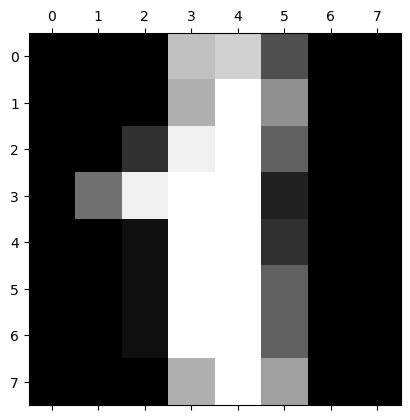

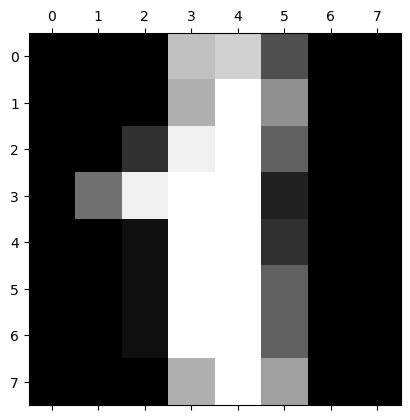

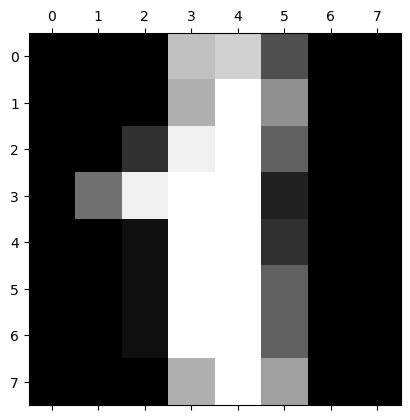

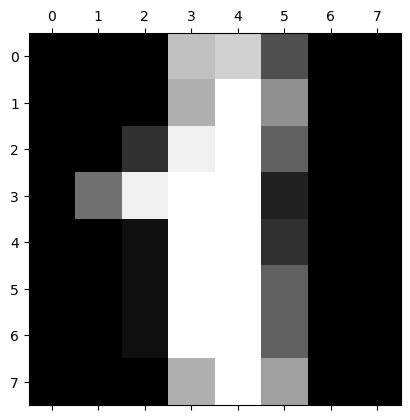

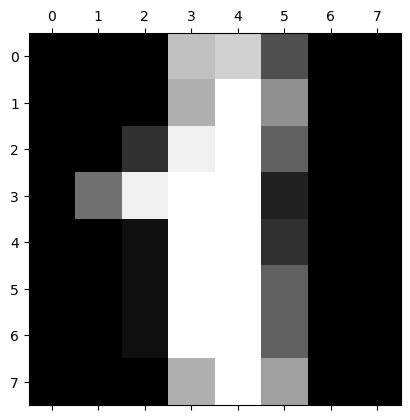

In [23]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[1])

In [24]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [25]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target,test_size=0.2) #20% to be test size and 80% to be training set

In [28]:
len(X_train)

1437

In [29]:
len(X_test)

360

In [30]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression() #creating obkect for the model

In [31]:
model.fit(X_train,y_train)

C:\Users\agnes\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
model.score(X_test,y_test)

0.9722222222222222

In [33]:
model.predict([digits.data[67]])

array([6])

In [36]:
#confution matrix
y_predicted = model.predict(X_test) #predicted value for x test
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_predicted)
cm

array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 39,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 41,  0,  1,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 38,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0, 21,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 30,  0,  0],
       [ 0,  4,  0,  0,  0,  0,  0,  0, 34,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  0, 37]], dtype=int64)

Text(95.72222222222221, 0.5, 'truth')

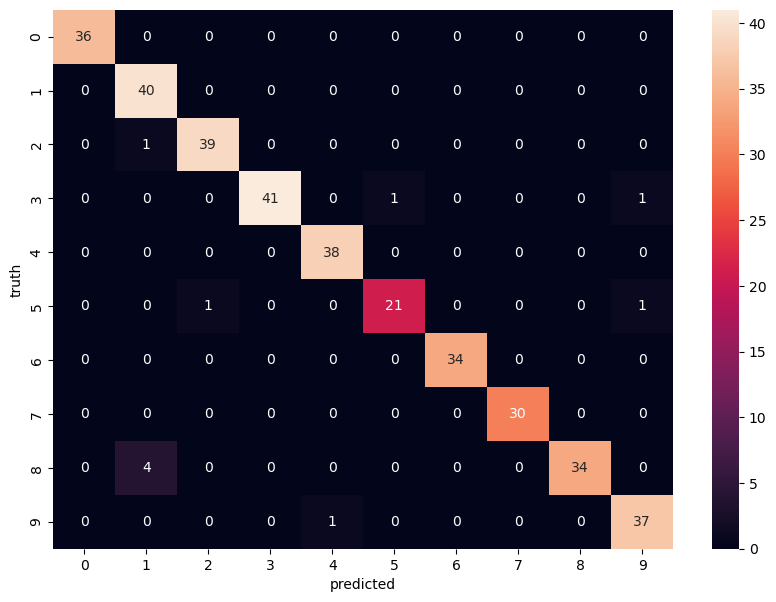

In [37]:
#confusin matrix visualization
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')

# Naive baye's algorithm

In [49]:
import pandas as pd
df_nv=pd.read_csv(r"C:\Users\agnes\Downloads\Practice files\titanic.csv")
df_nv.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [50]:
#dropping unnecessary variable
df_nv.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df_nv.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [51]:
#seperating dependent and independent variable 
target=df_nv.Survived
inputs=df_nv.drop('Survived',axis='columns')

In [52]:
#converting dummy column for sex column because its in text
dummies=pd.get_dummies(inputs.Sex)
dummies.head(3)

,female,male
0,0,1
1,1,0
2,1,0


In [53]:
#inserting this dummies to inputs
inputs=pd.concat([inputs,dummies],axis='columns')
inputs.head(3)

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0


In [54]:
#now the dummy column is there no need for sex column
inputs.drop('Sex',axis='columns',inplace=True)
inputs.head(5)

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1


In [55]:
#remove na values by by filling it with mean values
inputs.Age=inputs.Age.fillna(inputs.Age.mean())
inputs.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1


In [58]:
#splitting training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2)

In [59]:
len(X_train)

712

In [61]:
len(X_test)

179

In [62]:
len(inputs)

891

In [63]:
X_train

,Pclass,Age,Fare,female,male
824,3,2.000000,39.6875,0,1
856,1,45.000000,164.8667,1,0
340,2,2.000000,26.0000,0,1
559,3,36.000000,17.4000,1,0
860,3,41.000000,14.1083,0,1
...,...,...,...,...,...
109,3,29.699118,24.1500,1,0
391,3,21.000000,7.7958,0,1
262,1,52.000000,79.6500,0,1
114,3,17.000000,14.4583,1,0


In [65]:
#we are using gaussian naive bayes - when the data is normally distributed
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [66]:
model.fit(X_train,y_train)

GaussianNB()

In [67]:
model.score(X_test,y_test)

0.7486033519553073

In [68]:
y_test[:10]

801    1
681    1
174    0
611    0
735    0
359    1
18     0
509    1
421    0
94     0
Name: Survived, dtype: int64

In [69]:
model.predict(X_test[:10])

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 0], dtype=int64)

In [70]:
model.predict_proba(X_test[:10])

array([[0.01919618, 0.98080382],
       [0.68210403, 0.31789597],
       [0.92937358, 0.07062642],
       [0.99138268, 0.00861732],
       [0.99150989, 0.00849011],
       [0.04210868, 0.95789132],
       [0.04361566, 0.95638434],
       [0.97865437, 0.02134563],
       [0.98996706, 0.01003294],
       [0.99012571, 0.00987429]])

# Naive bayes example #spam detection

In [71]:
df_spam=pd.read_csv(r"C:\Users\agnes\Downloads\Practice files\spam.csv")
df_spam

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [72]:
#first groupby category
df_spam.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [73]:
#converting category and message to numbers because its in text
#we use lambda apply function for ham and spam
df_spam['spam']=df_spam['Category'].apply(lambda x: 1 if x=='spam' else 0)
df_spam.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [74]:
#splitting training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_spam.Message,df_spam.spam,test_size=0.25)

In [76]:
#converting 'message' column to number for that we use count vectorizer technique
from sklearn.feature_extraction.text import CountVectorizer
v=CountVectorizer()
x_train_count=v.fit_transform(X_train.values)
x_train_count.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [77]:
#for this we use multinominal nb
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(x_train_count,y_train)

MultinomialNB()

In [78]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count=v.transform(emails)
model.predict(emails_count)

array([0, 1], dtype=int64)

In [79]:
X_test_count=v.transform(X_test)
model.score(X_test_count,y_test)

0.9863603732950467

In [81]:
#pipeline to define the pipeline for the transformation
#before feeding to model we apply transformation for the raw data
#instead of the above two transformation steps we can use this pipeline
from sklearn.pipeline import Pipeline
clf=Pipeline([('vectorizer',CountVectorizer()), #convert the text to vector
             ('nb',MultinomialNB()) #then apply multinomial naive bayes
             ])

In [82]:
clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [83]:
#check performance
clf.score(X_test,y_test)

0.9863603732950467

In [84]:
clf.predict(emails)

array([0, 1], dtype=int64)